<a href="https://colab.research.google.com/github/RihemDri/Android/blob/master/Dridi_Rihem_Technical_Case_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Technical Case - Data Science
Dridi Rihem

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor



In [ ]:
# 1 Charger le fichier CSV

df =pd.read_csv('/content/DA-Technical Case.csv')

In [ ]:
# Afficher les prem lignes du dataset
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [ ]:
#----- y   la cible

target = 'Exam_Score'
#Les features
features = df.drop(target, axis=1)

In [ ]:
# Informations des données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

Prétraitement

In [ ]:
#Vérifiez les valeurs manquantes
df.isnull().sum()


,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
# Affiche seulement les colonnes avec des NaN
print(missing_values[missing_values > 0])


Teacher_Quality             78
Parental_Education_Level    90
Distance_from_Home          67
dtype: int64


In [ ]:
# Traitement des valeurs manquantes
# Imputation avec la moyenne ( donnees numériques)
# Imputation Mode
# A début j'ai supprimer apres j'ai changer  df.dropna(inplace=True)
for col in missing_values.index:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

<ipython-input-65-1866898639>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-65-1866898639>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

In [ ]:
#Vérifier si il   reste des   valeurs manquantes
df.isnull().sum().sum()


np.int64(0)

In [ ]:
# les colonnes categorielles
cat_colm = df.select_dtypes(include=['object']).columns.tolist()

# Encoder les colonnes catégorielles
df_encoded = pd.get_dummies(df, columns=cat_colm, drop_first=True)
df_encoded.head()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_Low,...,Teacher_Quality_Medium,School_Type_Public,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_Yes,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Male
0,23,84,7,73,0,3,67,True,False,False,...,True,True,False,True,False,True,False,False,True,True
1,19,64,8,59,2,4,61,True,False,False,...,True,True,False,False,False,False,False,True,False,False
2,24,98,7,91,2,4,74,False,True,False,...,True,True,True,False,False,False,True,False,True,True
3,29,89,8,98,1,4,71,True,False,False,...,True,True,False,False,False,True,False,True,False,True
4,19,92,6,65,3,4,70,False,True,False,...,False,True,True,False,False,False,False,False,True,False


In [ ]:

x = df_encoded.drop('Exam_Score', axis=1)
y = df_encoded['Exam_Score']
# Normalisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

Visualisation des données:


In [ ]:
#Visualisez la distribution des données en utilisant des graphes appropriés (e.g., histogrammes, box plots).

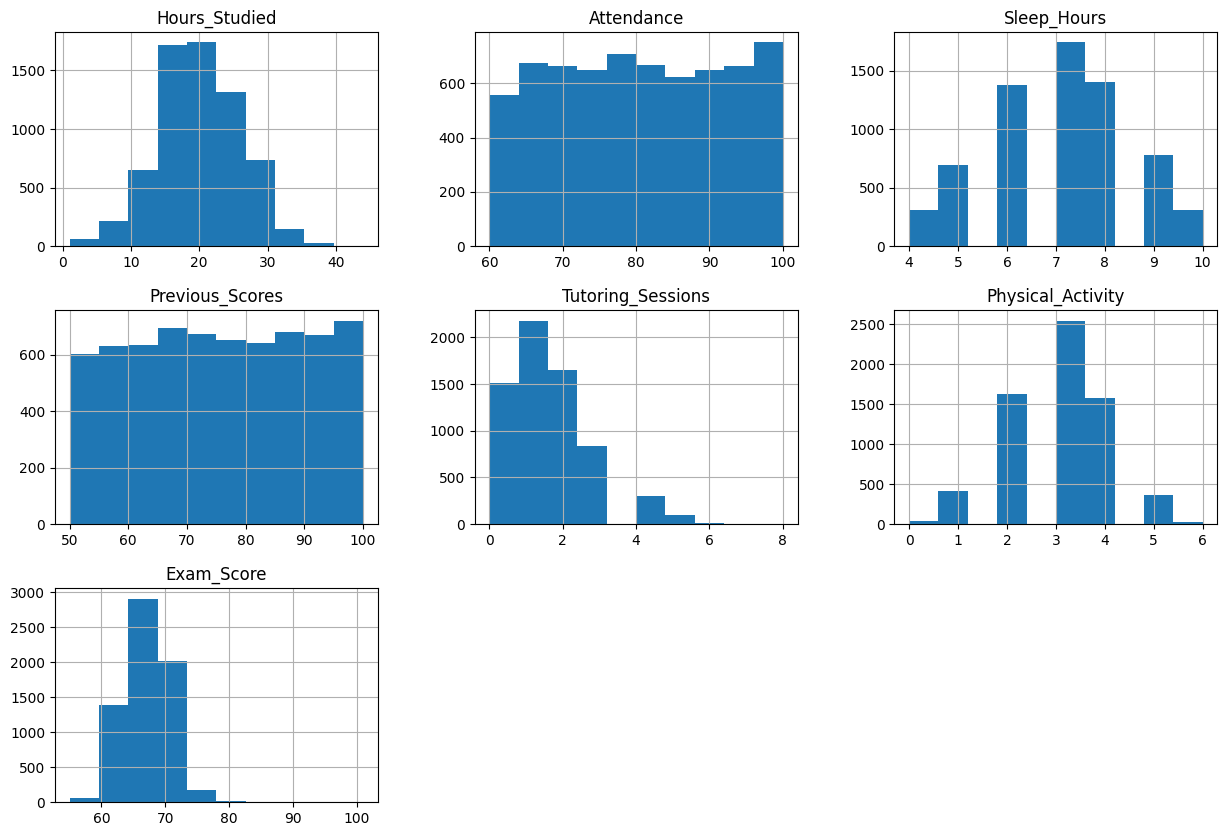

In [ ]:
df.hist (figsize=(15, 10))
plt.show()

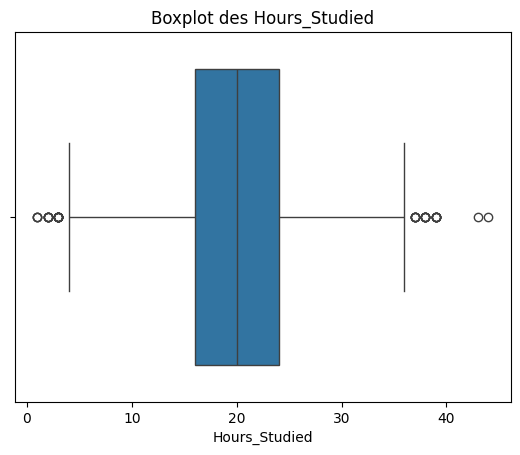

In [ ]:
# Boxplot pour les heures d'étude
sns.boxplot(x=df['Hours_Studied'])
plt.title("Boxplot des Hours_Studied")
plt.show()

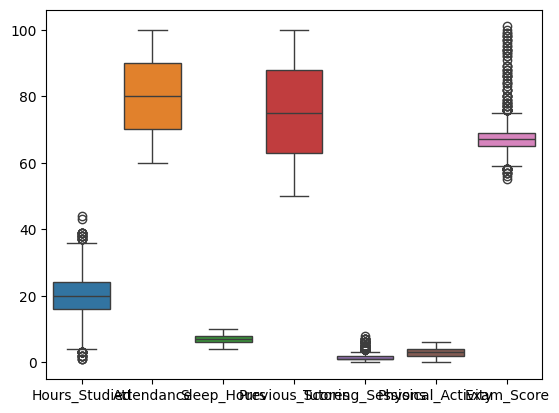

In [ ]:
# Boxplot pour les heures d'étude
sns.boxplot(df)
plt.show()

# Boxplot

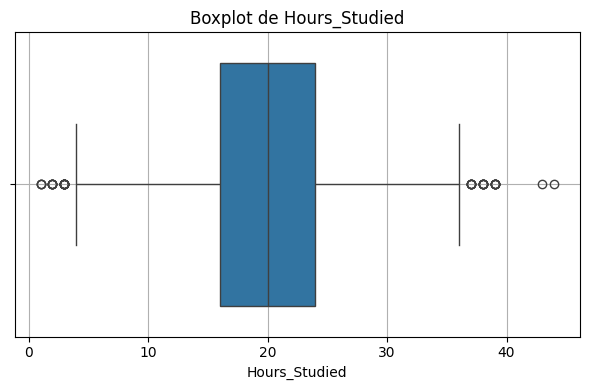

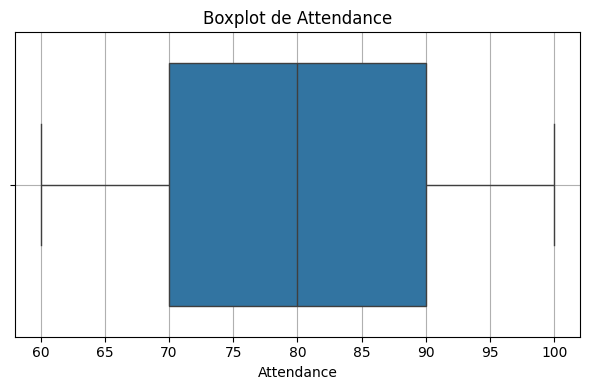

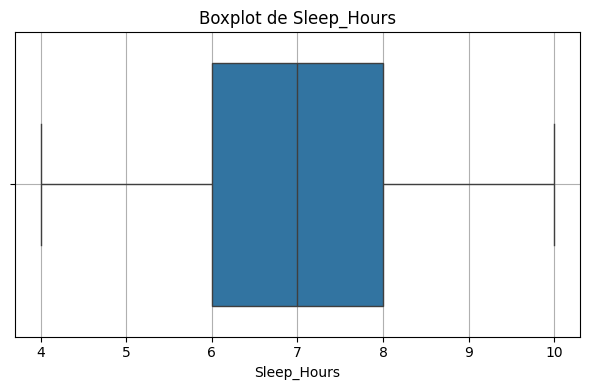

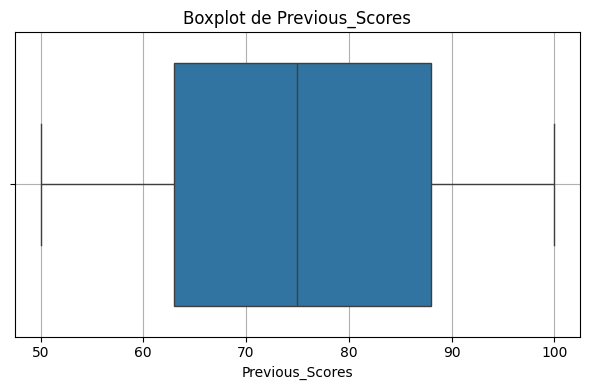

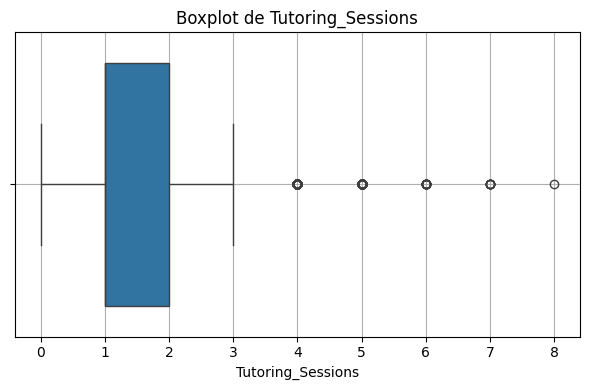

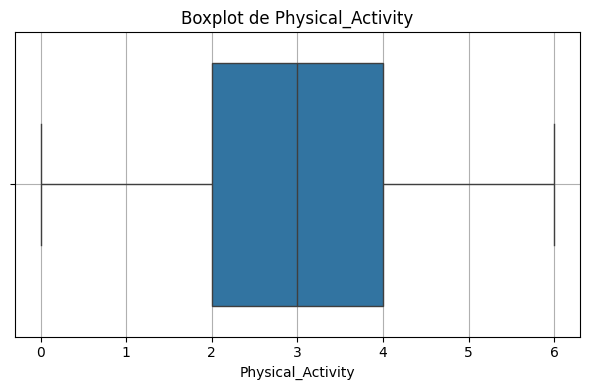

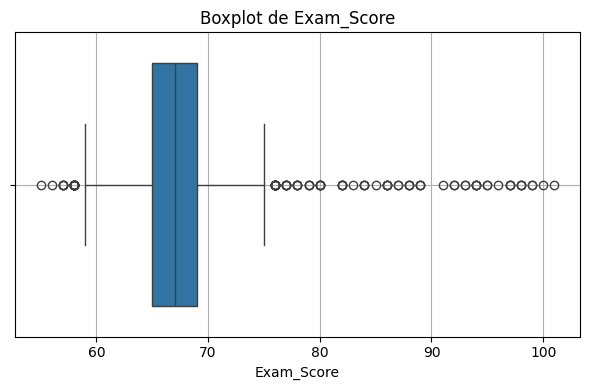

In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

 Séparation des données




In [ ]:
# Séparation des données
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
#Choix et entraînement du modèle

In [ ]:
#model GradientBoostingRegressor
model = GradientBoostingRegressor()
#Entraînez le modèle
model.fit(X_train, y_train)

GradientBoostingRegressor()

In [ ]:
# model LinearRegression
model1 = LinearRegression()
#Entraînez le modèle
model1.fit(X_train, y_train)

LinearRegression()

Évaluation  

In [ ]:
# Prédiction
#GradientBoostingRegressor
y_pred = model.predict(X_test)
# LinearRegression
y_pred1 = model1.predict(X_test)

In [ ]:
# Évaluation GradientBoostingRegressor
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE :", rmse)
print("R² :", r2)

RMSE : 1.9519553639133846
R² : 0.7304485173335269


In [ ]:
# Évaluation  LinearRegression
rmse = np.sqrt(mean_squared_error(y_test, y_pred1))
r2 = r2_score(y_test, y_pred1)

print("RMSE :", rmse)
print("R² :", r2)

RMSE : 1.804444509272284
R² : 0.7696495724907312


Visualisation des résultats :


In [ ]:
#Visualisation des résultats :


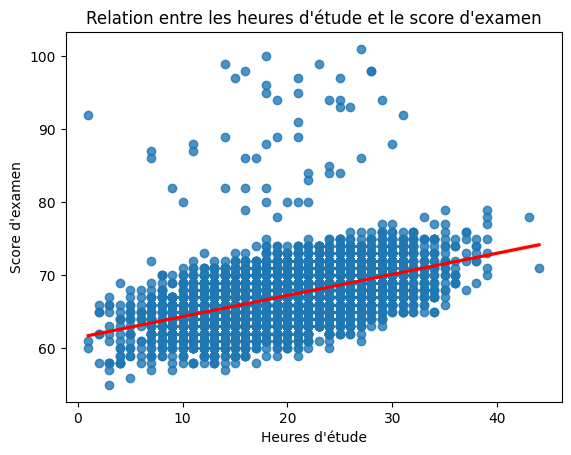

In [ ]:
# Graphique de régression

sns.regplot(data=df, x='Hours_Studied', y='Exam_Score', line_kws={"color":"red"})
plt.title("Relation entre les heures d'étude et le score d'examen")
plt.xlabel("Heures d'étude")
plt.ylabel("Score d'examen")
plt.show()

Analyse des caractéristiques :


In [ ]:
#l'importance des features
#imp  de chaque var
importances = model.feature_importances_
features_names = x.columns

# Tri et visualisation
importance_df = pd.DataFrame({'Feature': features_names, 'Importance': importances})
#sort par liportance
importance_df = importance_df.sort_values(by='Importance', ascending=False)


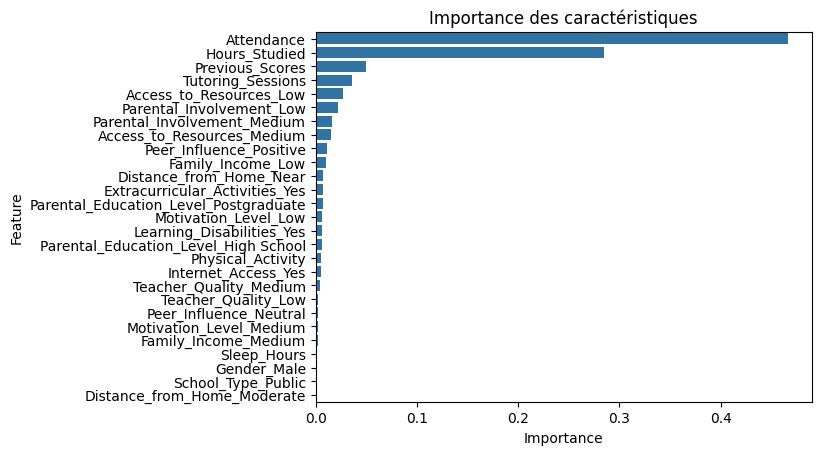

In [ ]:
#graphe
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title("Importance des caractéristiques")
plt.show()